# FashionMNISTでTensorFlow

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import keras

Using TensorFlow backend.


In [4]:
# FashionMNIST読み込む
fashion_mnist = keras.datasets.fashion_mnist

(train_data, train_teacher_labels), (test_data, test_teacher_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
fashion_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# データ型かくにん
print(train_data.shape)
print(test_data.shape)

(60000, 28, 28)
(10000, 28, 28)


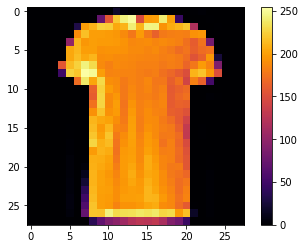

In [13]:
plt.figure()
plt.imshow(train_data[17], cmap='inferno')
plt.colorbar()
plt.grid(False)

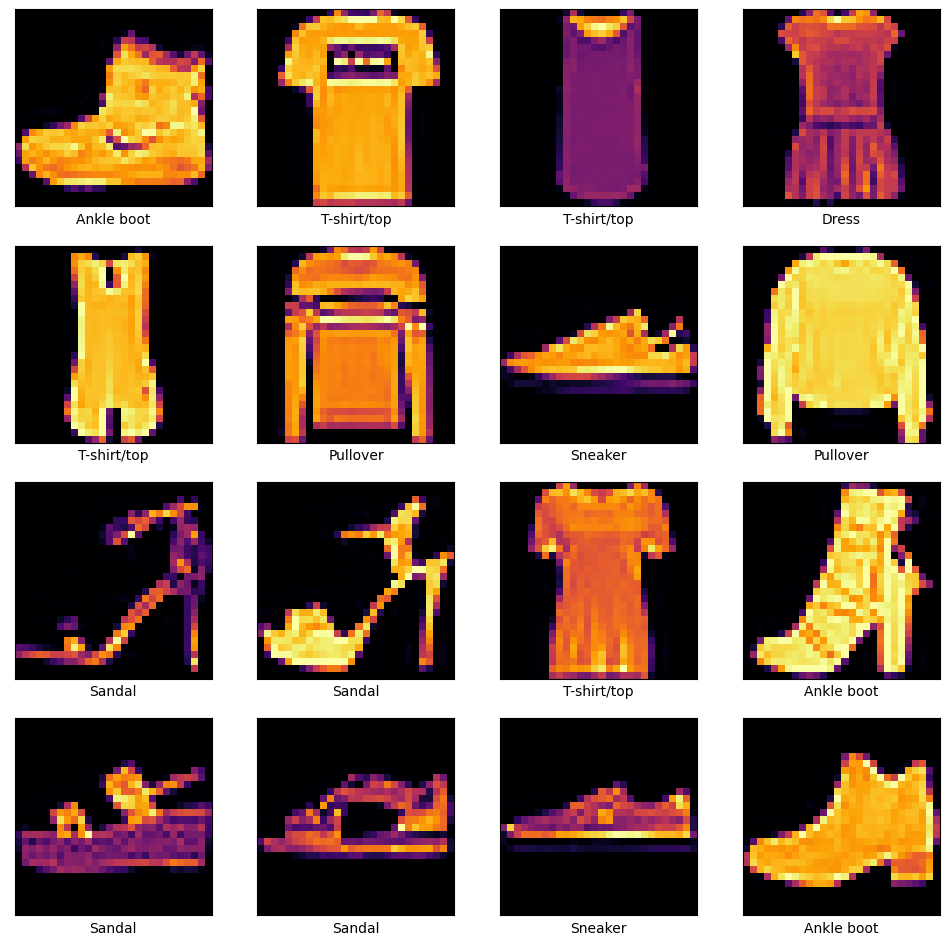

In [14]:
plt.figure(figsize=(12,12), dpi=100)
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[i], cmap='inferno')
  plt.xlabel(fashion_names[train_teacher_labels[i]])

In [0]:
# 学習の設定
BATCH_SIZE =  128
NUM_CLASSES = 10
EPOCHS = 20

IMG_ROWS, IMG_COLS = 28, 28


In [0]:
# 学習モデルに合わせてデータの調整
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [0]:
train_data /= 255
test_data /= 255

In [0]:
# 学習モデルの構築
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

In [30]:
model = Sequential()

# Input
model.add(Flatten(input_shape = (IMG_ROWS, IMG_COLS)))

# Hidden
model.add(Dense(128, activation=tf.nn.relu))

# Output
model.add(Dense(10, activation=tf.nn.softmax))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# モデルのコンパイル
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
def plot_loss_accuracy_graph(fit_record):
  plt.plot(fit_record.history['loss'], '-D', c='b', label='train_loss', lw=2)
  plt.plot(fit_record.history['val_loss'],'-D', c='r', label='val_loss', lw=2 )
  plt.title('LOSS')
  plt.xlabel('EPOCHS')
  plt.ylabel('LOSS')
  plt.legend(loc='upper right')
  plt.show()

  plt.plot(fit_record.history['accuracy'], '-o', c='g', label='train_accuracy', lw=2)
  plt.plot(fit_record.history['val_accuracy'], '-o', c='y', label='val_accuracy', lw=2)
  plt.title('ACCURACY')
  plt.xlabel('EPOCHS')
  plt.ylabel('LOSS')
  plt.legend(loc='lower right')
  plt.show()

In [33]:
# 学習する
print('反復回数：', EPOCHS)
fit_record = model.fit(train_data, train_teacher_labels,
                       batch_size=BATCH_SIZE,
                       epochs=EPOCHS,
                       verbose=1,
                       validation_data=(test_data, test_teacher_labels))

反復回数： 20
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.5554 - accuracy: 0.8101 - val_loss: 0.4606 - val_accuracy: 0.8405
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.4002 - accuracy: 0.8590 - val_loss: 0.4127 - val_accuracy: 0.8530
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3632 - accuracy: 0.8718 - val_loss: 0.3962 - val_accuracy: 0.8581
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3407 - accuracy: 0.8782 - val_loss: 0.3919 - val_accuracy: 0.8618
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3211 - accuracy: 0.8848 - val_loss: 0.3816 - val_accuracy: 0.8620
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3049 - accuracy: 0.8898 - val_loss: 0.3504 - val_accuracy: 0.8728
Epoch 7/20
60000/60000 [==============================] - 1

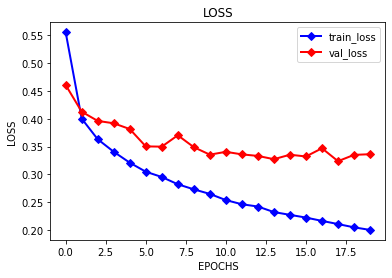

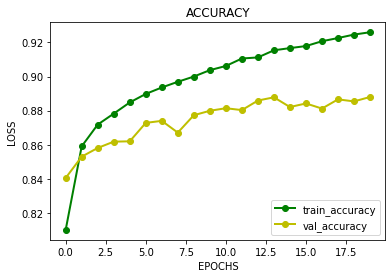

In [34]:
plot_loss_accuracy_graph(fit_record)

In [35]:
fit_record.history['accuracy']

[0.81005,
 0.85905,
 0.8718,
 0.8782333,
 0.8847833,
 0.8897833,
 0.89356667,
 0.8969,
 0.89996666,
 0.9037167,
 0.9061667,
 0.91055,
 0.91118336,
 0.91536665,
 0.91665,
 0.91785,
 0.9206833,
 0.92255,
 0.9245833,
 0.92595]

In [36]:
# validation
result_score = model.evaluate(test_data, test_teacher_labels)

print('検証誤差：', result_score[0])
print('検証正解率：', result_score[1])

10000/10000 [==============================] - 0s 41us/step
検証誤差： 0.33635038150548935
検証正解率： 0.8880000114440918


In [37]:
# prediction
data_location=17
img = test_data[data_location]
print(img.shape)

(28, 28)


In [38]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [39]:
predictions_result_array = model.predict(img)
print(predictions_result_array)

[[9.5412412e-05 4.3836513e-07 9.6734333e-01 7.1743322e-08 3.1458501e-02
  6.3039533e-14 1.0841286e-03 8.0553020e-10 1.8053101e-05 4.6257262e-10]]


In [40]:
number = np.argmax(predictions_result_array[0])
print('予測結果：', fashion_names[number])

予測結果： Pullover


In [0]:
# 学習モデルの保存
model.save('keras-fashion-mnist-model.h5')